In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Loading Data
df = pd.read_csv('archive/index_1.csv')

In [2]:
# Data wrangling
df['time'] = pd.to_datetime(df['datetime']).dt.strftime('%H:%M:%S') 
df['date'] = pd.to_datetime(df['date'])  
df['year_month'] = df['date'].dt.to_period('M')  

In [3]:
df.tail()


,date,datetime,cash_type,card,money,coffee_name,time,year_month
3631,2025-03-23,2025-03-23 10:34:54.894,card,ANON-0000-0000-1158,35.76,Cappuccino,10:34:54,2025-03
3632,2025-03-23,2025-03-23 14:43:37.362,card,ANON-0000-0000-1315,35.76,Cocoa,14:43:37,2025-03
3633,2025-03-23,2025-03-23 14:44:16.864,card,ANON-0000-0000-1315,35.76,Cocoa,14:44:16,2025-03
3634,2025-03-23,2025-03-23 15:47:28.723,card,ANON-0000-0000-1316,25.96,Americano,15:47:28,2025-03
3635,2025-03-23,2025-03-23 18:11:38.635,card,ANON-0000-0000-1275,35.76,Latte,18:11:38,2025-03


In [5]:
# grouped sales by month and year
monthly_sales = df.groupby('year_month')['money'].sum().reset_index()
print(monthly_sales)

   year_month     money
0     2024-03   7050.20
1     2024-04   6720.56
2     2024-05   9063.42
3     2024-06   7758.76
4     2024-07   6915.94
5     2024-08   7613.84
6     2024-09   9988.64
7     2024-10  13891.16
8     2024-11   8590.54
9     2024-12   8237.74
10    2025-01   6398.86
11    2025-02  13215.48
12    2025-03   9986.44


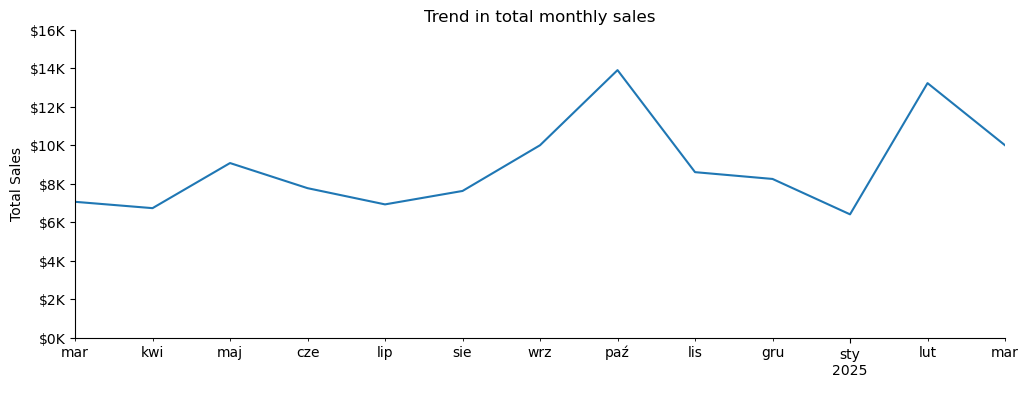

In [23]:
monthly_sales.plot(kind="line",x="year_month",  y="money", figsize=(12,4), legend=False)

ticks_y = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().yaxis.set_major_formatter(ticks_y)
plt.xlabel(" ")
plt.ylabel("Total Sales")
plt.title("Trend in total monthly sales")
plt.grid(False)
plt.ylim(0,16000)
sns.despine()
plt.show()

<Axes: xlabel='date', ylabel='money'>

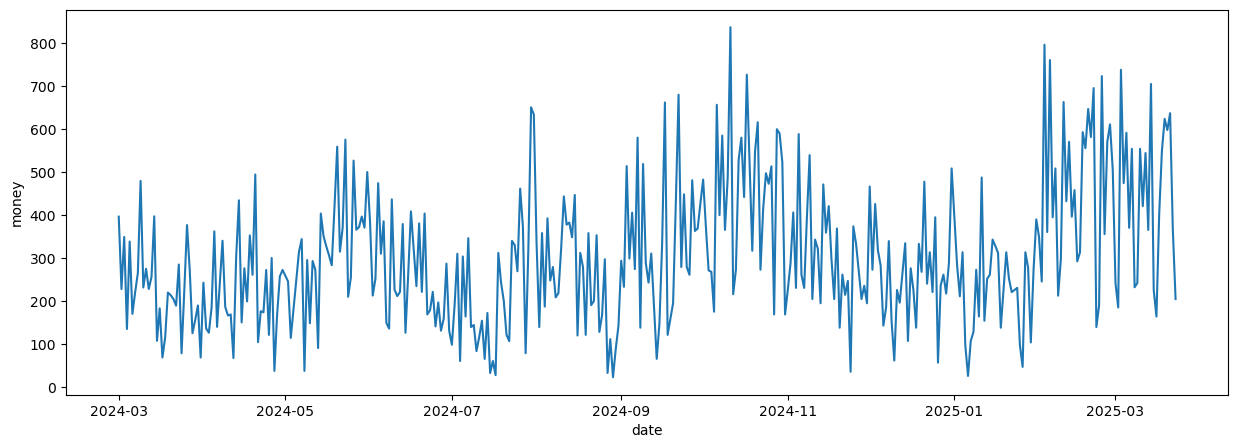

In [9]:
daily_trend = df.groupby('date')['money'].sum()
plt.figure(figsize=(15,5))

sns.lineplot(data=daily_trend)

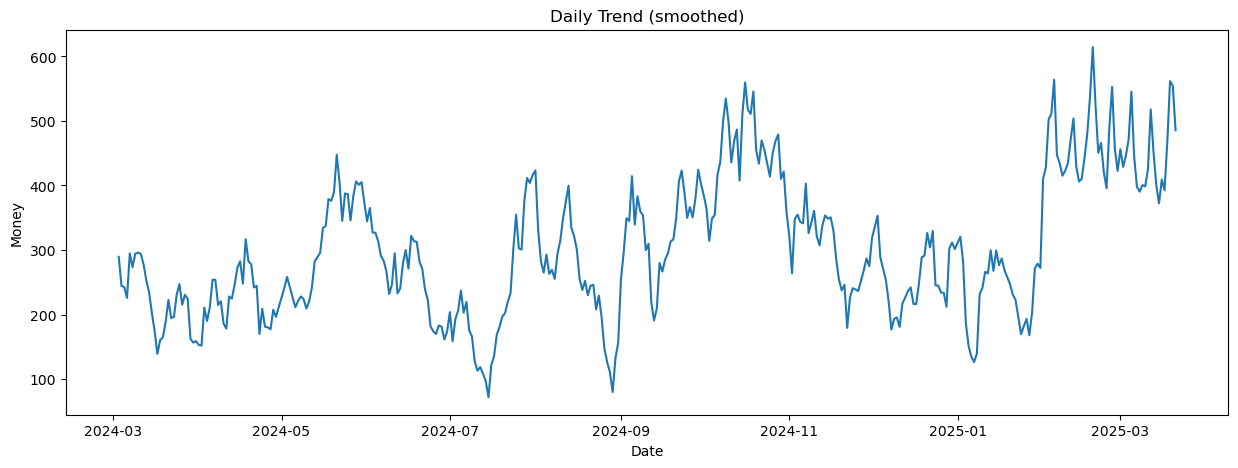

In [10]:
daily_trend_smooth = daily_trend.rolling(window=5, center=True).mean()
plt.figure(figsize=(15,5))
sns.lineplot(x=daily_trend_smooth.index, y=daily_trend_smooth)
plt.title('Daily Trend (smoothed)')
plt.xlabel('Date')
plt.ylabel('Money')
plt.show()

In [11]:
coffe_type_sales = df.pivot_table(index='year_month',columns='coffee_name', values='money',aggfunc='sum' )
coffe_type_sales

coffee_name,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
year_month,,,,,,,,
2024-03,1044.80,1154.00,780.50,232.20,869.20,241.00,854.00,1874.50
2024-04,1001.94,1407.74,1659.44,232.82,548.48,171.00,506.02,1193.12
2024-05,1348.80,1908.28,2078.44,340.76,474.64,185.14,529.36,2198.00
2024-06,390.88,2268.12,1735.12,189.88,530.48,230.20,528.08,1886.00
2024-07,858.12,1863.80,1079.64,300.28,322.28,273.28,361.02,1857.52
2024-08,851.74,2010.24,1115.88,361.02,920.80,253.68,196.92,1903.56
2024-09,739.58,2930.14,1360.32,298.32,961.46,217.44,366.90,3114.48
2024-10,1142.24,2530.52,1573.44,1144.32,882.64,252.72,2074.08,4291.20
2024-11,649.00,1604.72,929.76,1251.60,337.48,63.18,1323.12,2431.68


<Axes: xlabel='year_month'>

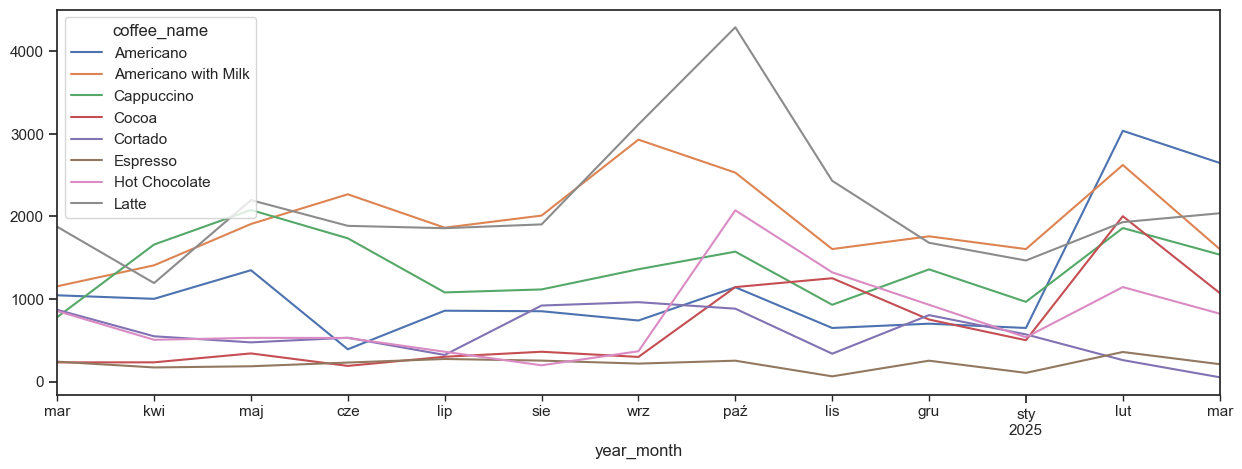

In [ ]:
coffe_type_sales.plot(kind='line',figsize=(15,5), legend=True)

In [12]:
# Get monthly totals
sales_totals = df.groupby('year_month')['money'].sum()

sales_totals

year_month
2024-03     7050.20
2024-04     6720.56
2024-05     9063.42
2024-06     7758.76
2024-07     6915.94
2024-08     7613.84
2024-09     9988.64
2024-10    13891.16
2024-11     8590.54
2024-12     8237.74
2025-01     6398.86
2025-02    13215.48
2025-03     9986.44
Freq: M, Name: money, dtype: float64

In [13]:
coffe_type_sales_percent = coffe_type_sales.div(sales_totals/100, axis=0)

In [14]:
coffe_type_sales_percent

coffee_name,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
year_month,,,,,,,,
2024-03,14.819438,16.368330,11.070608,3.293524,12.328728,3.418343,12.113132,26.587898
2024-04,14.908579,20.946766,24.691990,3.464295,8.161225,2.544431,7.529432,17.753282
2024-05,14.881800,21.054745,22.932182,3.759729,5.236875,2.042717,5.840621,24.251331
2024-06,5.037918,29.233022,22.363367,2.447298,6.837175,2.966969,6.806242,24.308008
2024-07,12.407858,26.949337,15.610893,4.341854,4.659959,3.951451,5.220115,26.858533
2024-08,11.186734,26.402446,14.655942,4.741628,12.093766,3.331827,2.586343,25.001313
2024-09,7.404211,29.334724,13.618671,2.986593,9.625535,2.176873,3.673173,31.180221
2024-10,8.222783,18.216765,11.326916,8.237757,6.353969,1.819287,14.930934,30.891589
2024-11,7.554822,18.680083,10.823068,14.569515,3.928507,0.735460,15.402059,28.306486


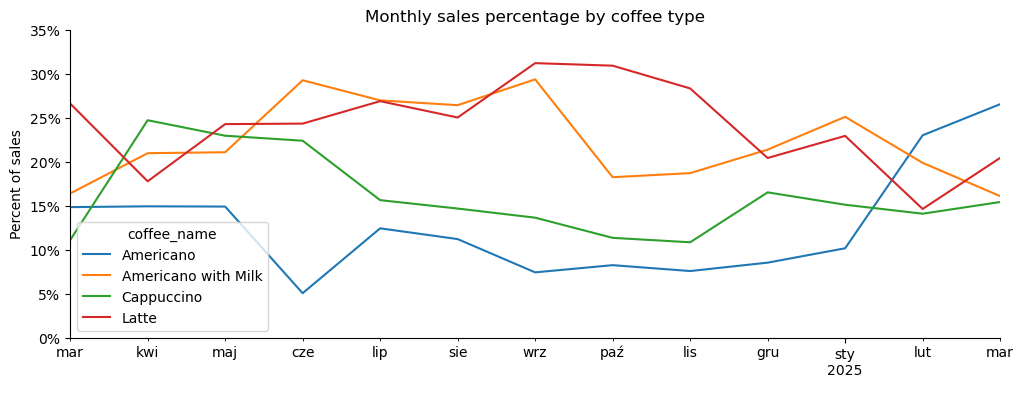

In [25]:
coffe_type_sales_percent[['Americano','Americano with Milk','Cappuccino','Latte']].plot(kind='line',figsize=(12,4), legend=True)
ticks_y = plt.FuncFormatter(lambda y, pos: f'{y:.0f}%')
plt.gca().yaxis.set_major_formatter(ticks_y)
plt.ylim(0,35)
plt.xlabel(" ")
plt.ylabel("Percent of sales")
plt.title("Monthly sales percentage by coffee type")
plt.grid(False)
sns.despine()
plt.show()

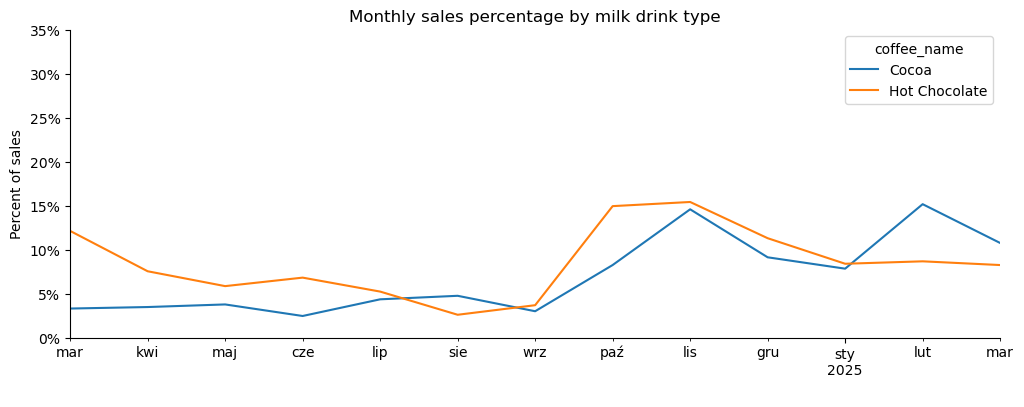

In [27]:
coffe_type_sales_percent[['Cocoa','Hot Chocolate']].plot(kind='line',figsize=(12,4), legend=True)
ticks_y = plt.FuncFormatter(lambda y, pos: f'{y:.0f}%')
plt.gca().yaxis.set_major_formatter(ticks_y)
plt.ylim(0,35)
plt.xlabel(" ")
plt.ylabel("Percent of sales")
plt.title("Monthly sales percentage by milk drink type")
plt.grid(False)
sns.despine()
plt.show()

In [5]:
cardcount = df['card'].value_counts()
cardcount


card
ANON-0000-0000-0012    129
ANON-0000-0000-0141    108
ANON-0000-0000-1163     77
ANON-0000-0000-0276     69
ANON-0000-0000-0009     67
                      ... 
ANON-0000-0000-0561      1
ANON-0000-0000-0562      1
ANON-0000-0000-0563      1
ANON-0000-0000-0564      1
ANON-0000-0000-1316      1
Name: count, Length: 1316, dtype: int64

In [12]:
one_time = (cardcount == 1).sum()
few_times = ((cardcount >= 2) & (cardcount <= 5)).sum()
many_times = (cardcount > 5).sum()

print(f"Liczba kart z 1 zakupem: {one_time}")
print(f"Liczba kart z 2-5 zakupami: {few_times}")
print(f"Liczba kart z ponad 5 zakupami: {many_times}")

Liczba kart z 1 zakupem: 771
Liczba kart z 2-5 zakupami: 451
Liczba kart z ponad 5 zakupami: 94


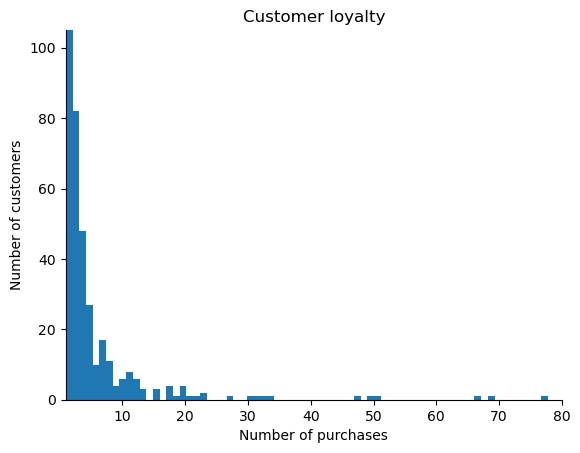

In [27]:
cardcount.hist(bins=120)
plt.xlim(1,80)
plt.ylim(0,105)
plt.xlabel("Number of purchases")
plt.ylabel("Number of customers")
plt.title("Customer loyalty")
plt.grid(False)
sns.despine()
plt.show()